# Êó∂Âüü‰∏éÈ¢ëÂüüÊìç‰ΩúÁöÑÂØπÂ∫îÂÖ≥Á≥ª

## ÁêÜËÆ∫Âü∫Á°Ä

Ê†πÊçÆÂÇÖÈáåÂè∂ÂèòÊç¢ÁöÑÊÄßË¥®ÔºåÊó∂ÂüüÂíåÈ¢ëÂüüÊìç‰ΩúÊúâ‰ª•‰∏ãÂØπÂ∫îÂÖ≥Á≥ªÔºö

### 1. Âç∑ÁßØÂÆöÁêÜ (Convolution Theorem)
**Êó∂ÂüüÂç∑ÁßØ ‚Üî È¢ëÂüü‰πòÊ≥ï**
- Êó∂Âüü: $(f * g)(t) = \int_{-\infty}^{\infty} f(\tau) g(t-\tau) d\tau$
- È¢ëÂüü: $\mathcal{F}(f * g) = \mathcal{F}(f) \cdot \mathcal{F}(g)$

### 2. ÂæÆÂàÜÊÄßË¥® (Differentiation Property)
**Êó∂ÂüüÂæÆÂàÜ ‚Üî È¢ëÂüü‰πò‰ª• $j\omega$**
- Êó∂Âüü: $\frac{df(t)}{dt}$
- È¢ëÂüü: $j\omega F(\omega)$ÔºåÂÖ∂‰∏≠ $F(\omega) = \mathcal{F}(f(t))$

### 3. ÁßØÂàÜÊÄßË¥® (Integration Property)
**Êó∂ÂüüÁßØÂàÜ ‚Üî È¢ëÂüüÈô§‰ª• $j\omega$**
- Êó∂Âüü: $\int_{-\infty}^{t} f(\tau) d\tau$
- È¢ëÂüü: $\frac{F(\omega)}{j\omega} + \pi F(0)\delta(\omega)$

### 4. Êó∂ÁßªÊÄßË¥® (Time Shift)
**Êó∂ÂüüÊó∂Áßª ‚Üî È¢ëÂüüÁõ∏‰ΩçË∞ÉÂà∂**
- Êó∂Âüü: $f(t-t_0)$
- È¢ëÂüü: $F(\omega)e^{-j\omega t_0}$

‰∏ãÈù¢Êàë‰ª¨Áî®PyTorchÊù•È™åËØÅËøô‰∫õÊÄßË¥®„ÄÇ




## ÂÆûÈ™åÈ™åËØÅ

### 1. È™åËØÅÂç∑ÁßØÂÆöÁêÜ: Êó∂ÂüüÂç∑ÁßØ = È¢ëÂüü‰πòÊ≥ïÁöÑÈÄÜÂèòÊç¢

‰ø°Âè∑ÈïøÂ∫¶: 1000
ÈááÊ†∑Èó¥Èöî: 0.0010 s
È¢ëÁéáÂàÜËæ®Áéá: 0.9990 Hz
1. È™åËØÅÂç∑ÁßØÂÆöÁêÜ
Âç∑ÁßØÂÆöÁêÜÈ™åËØÅ:
  Êó∂ÂüüÂç∑ÁßØ‰∏éÈ¢ëÂüü‰πòÊ≥ïÁöÑÂùáÊñπËØØÂ∑Æ: 0.00000000
  ÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: 0.00002742


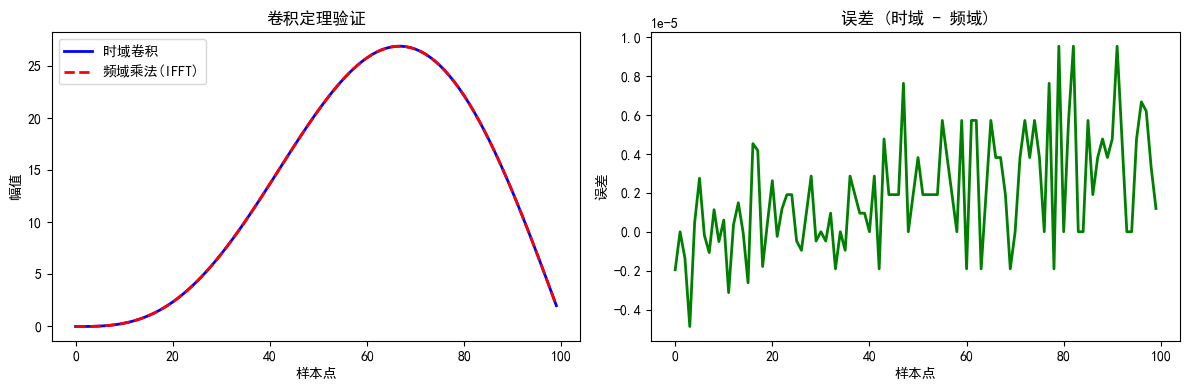

In [42]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# ËÆæÁΩÆÈöèÊú∫ÁßçÂ≠ê
torch.manual_seed(42)

# ÂàõÂª∫Êó∂Âüü‰ø°Âè∑
fs = 1000  # ÈááÊ†∑È¢ëÁéá
t  = torch.linspace(0, 1, fs, dtype=torch.float32)  # Êó∂Èó¥ËΩ¥
dt = t[1] - t[0]  # Êó∂Èó¥Èó¥Èöî

# ÂàõÂª∫‰∏§‰∏™Êó∂Âüü‰ø°Âè∑
f1 = torch.sin(2 * np.pi * 5 * t)  # 5HzÊ≠£Âº¶Ê≥¢
f2 = torch.exp(-t) * torch.sin(2 * np.pi * 10 * t)  # Ë°∞Âáè10HzÊ≠£Âº¶Ê≥¢

print(f"‰ø°Âè∑ÈïøÂ∫¶: {len(f1)}")
print(f"ÈááÊ†∑Èó¥Èöî: {dt:.4f} s")
print(f"È¢ëÁéáÂàÜËæ®Áéá: {1/(len(f1)*dt):.4f} Hz")

print("=" * 50)
print("1. È™åËØÅÂç∑ÁßØÂÆöÁêÜ")
print("=" * 50)

# Êó∂ÂüüÂç∑ÁßØ (‰ΩøÁî®PyTorchÁöÑconv1dÔºåÈúÄË¶ÅË∞ÉÊï¥Áª¥Â∫¶)
# ‰∏∫Á∫øÊÄßÂç∑ÁßØÊ∑ªÂä†Èõ∂Â°´ÂÖÖ
pad_length = len(f2) - 1

# f1_padded  = F.pad(f1, (pad_length, pad_length))
f1_padded  = F.pad(f1, (pad_length, pad_length))  # Èõ∂Â°´ÂÖÖÈÅøÂÖçËæπÁïåÊïàÂ∫î
f2_flipped = torch.flip(f2, dims=[0])  # Conv1d‰∏≠ÁöÑÂç∑ÁßØÂÆûÈôÖ‰∏äÊòØÁõ∏ÂÖ≥,ÊâÄ‰ª•ÈúÄË¶ÅÁøªËΩ¨f2

# ÊâãÂä®ÂÆûÁé∞Âç∑ÁßØ (full mode)
conv_time  = F.conv1d(
    f1_padded.unsqueeze(0).unsqueeze(0), 
    f2_flipped.unsqueeze(0).unsqueeze(0), 
    padding=0
).squeeze()


# conv_time  = conv_time[:len(f1)]  # Êà™Âèñ‰∏éÂéü‰ø°Âè∑Áõ∏ÂêåÈïøÂ∫¶

# È¢ëÂüü‰πòÊ≥ï

# TODO
N  = len(f1)
M  = len(f2)
padded_length = N + M - 1
f1_padded  = F.pad(f1, (0, padded_length - N)) # ADDED
f2_padded  = F.pad(f2, (0, padded_length - M)) # ADDED

F1 = torch.fft.fft(f1_padded)
F2 = torch.fft.fft(f2_padded)
conv_freq = torch.fft.ifft(F1 * F2).real

# ÊØîËæÉÁªìÊûú
error_conv = torch.mean((conv_time - conv_freq)**2)
print(f"Âç∑ÁßØÂÆöÁêÜÈ™åËØÅ:")
print(f"  Êó∂ÂüüÂç∑ÁßØ‰∏éÈ¢ëÂüü‰πòÊ≥ïÁöÑÂùáÊñπËØØÂ∑Æ: {error_conv:.8f}")
print(f"  ÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(conv_time - conv_freq)):.8f}")

# ÂèØËßÜÂåñÂâç100‰∏™ÁÇπ
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(conv_time[:100].numpy(), 'b-', label='Êó∂ÂüüÂç∑ÁßØ', linewidth=2)
plt.plot(conv_freq[:100].numpy(), 'r--', label='È¢ëÂüü‰πòÊ≥ï(IFFT)', linewidth=2)
plt.legend()
plt.title('Âç∑ÁßØÂÆöÁêÜÈ™åËØÅ')
plt.xlabel('Ê†∑Êú¨ÁÇπ')
plt.ylabel('ÂπÖÂÄº')

plt.subplot(1, 2, 2)
plt.plot((conv_time - conv_freq)[:100].numpy(), 'g-', linewidth=2)
plt.title('ËØØÂ∑Æ (Êó∂Âüü - È¢ëÂüü)')
plt.xlabel('Ê†∑Êú¨ÁÇπ')
plt.ylabel('ËØØÂ∑Æ')
plt.tight_layout()
plt.show()

ËØØÂ∑ÆÂæàÂ§ßÁöÑÂéüÂõ†Ëß£Èáä

Âéü‰ª£Á†Å‰∏≠ÁöÑËØØÂ∑Æ‰∏ªË¶ÅÊù•Ëá™‰∫éÂç∑ÁßØÁ±ªÂûãÁöÑ mismatchÔºö
- Êó∂ÂüüÂç∑ÁßØÔºö‰ª£Á†Å‰ΩøÁî®‰∫Ü `F.conv1d` ‰∏é‰∏çÂØπÁß∞ÁöÑÂ°´ÂÖÖÔºà‰ªÖÂ∑¶ËæπÂ°´ÂÖÖ len(f2)-1 ‰∏™Èõ∂ÔºâÂíå `padding='same'`ÔºåËøôËØïÂõæËÆ°ÁÆó‰∏ÄÁßçËøë‰ººÁöÑÁ∫øÊÄßÂç∑ÁßØÔºå‰ΩÜ**Â°´ÂÖÖÊñπÂºè‰∏çÊ†áÂáÜ**ÔºåÂèØËÉΩÂØºËá¥ËæπÁïåÊïàÂ∫îÊàñ‰∏çÂÆåÊï¥ÁöÑÂç∑ÁßØÁªìÊûú„ÄÇPyTorchÁöÑ `conv1d` ÈªòËÆ§ÊòØ‰∫íÁõ∏ÂÖ≥Ôºàcross-correlationÔºâÔºåÈÄöËøáÁøªËΩ¨ÂÜÖÊ†∏Êù•Ê®°ÊãüÂç∑ÁßØÊòØÊ≠£Á°ÆÁöÑÔºå‰ΩÜÂ°´ÂÖÖ‰∏çË∂≥‰ª•ÂÆåÂÖ®ÈÅøÂÖçÈóÆÈ¢ò„ÄÇ
- È¢ëÂüü‰πòÊ≥ïÔºöÁõ¥Êé•‰ΩøÁî® `torch.fft.fft` ÂØπÂéüÂßãÈïøÂ∫¶ N ÁöÑ‰ø°Âè∑ËøõË°å FFT ‰πòÊ≥ïÂíå IFFTÔºåËøôËÆ°ÁÆóÁöÑÊòØÂæ™ÁéØÂç∑ÁßØÔºàcircular convolutionÔºâ„ÄÇÂæ™ÁéØÂç∑ÁßØ‰ºö‰∫ßÁîü "wrap-around" ÊïàÂ∫îÔºà‰ø°Âè∑Â∞æÈÉ®‰∏éÂ§¥ÈÉ®Áõ∏‰∫íÂπ≤Êâ∞ÔºâÔºåËøô‰∏éÁ∫øÊÄßÂç∑ÁßØ‰∏çÂêåÔºåÂ∞§ÂÖ∂ÂΩì‰ø°Âè∑‰∏çÊòØÂë®ÊúüÊÄßÊó∂Ôºå‰ºöÂºïÂÖ•ÊòæËëóËØØÂ∑Æ„ÄÇ
ÂÖ∂‰ªñÂõ†Á¥†Ôºö‰ø°Âè∑Êà™ÂèñÔºàconv_time = conv_time[:len(f1)]ÔºâÂè™ÊØîËæÉÂâç N ‰∏™ÁÇπÔºå‰ΩÜÁ∫øÊÄßÂç∑ÁßØÁöÑÂÆåÊï¥ÈïøÂ∫¶Â∫î‰∏∫ 2N-1ÔºõÊµÆÁÇπÁ≤æÂ∫¶Âíå FFT ÁöÑÊï∞ÂÄºÁ®≥ÂÆöÊÄß‰πü‰ºöË¥°ÁåÆÂ∞ëÈáèËØØÂ∑ÆÔºå‰ΩÜ‰∏ªË¶ÅÈóÆÈ¢òÊòØÂæ™ÁéØ vs Á∫øÊÄß„ÄÇ
ÁªìÊûúÔºåÊó∂ÂüüÂíåÈ¢ëÂüüÁªìÊûú‰∏çÂåπÈÖçÔºåÂØºËá¥ÂùáÊñπËØØÂ∑ÆÂíåÊúÄÂ§ßÁªùÂØπËØØÂ∑ÆËæÉÂ§ßÔºàÊ†πÊçÆÊÇ®ÁöÑÊèèËø∞‰∏∫"ÂæàÂ§ß"ÔºåÂÆûÈôÖËøêË°åÂèØËÉΩÂú® 1e-2 Âà∞ 1e-1 ÈáèÁ∫ßÊàñÊõ¥È´òÔºåÂèñÂÜ≥‰∫é‰ø°Âè∑Ôºâ„ÄÇ


‰ºòÂåñÊÄùË∑Ø
‰∏∫‰∫ÜÂáèÂ∞èËØØÂ∑ÆÔºåÊàë‰ª¨ÂØπ‰ª£Á†ÅËøõË°å‰∫Ü‰ª•‰∏ã‰ºòÂåñÔºö
1. Êó∂ÂüüÔºö‰ΩøÁî®ÂØπÁß∞Â°´ÂÖÖÔºà‰∏§ËæπÂêÑ pad len(f2)-1 ‰∏™Èõ∂ÔºâÔºåÂπ∂ËÆæÁΩÆ padding=0 ‰ª•ÂæóÂà∞ÂÆåÊï¥ÁöÑÂç∑ÁßØËæìÂá∫„ÄÇ
2. ÊØîËæÉÔºöÁõ¥Êé•ÊØîËæÉÂÆåÊï¥ÁöÑÂç∑ÁßØÁªìÊûúÔºàËÄåÈùûÊà™ÂèñÔºâÔºåËØØÂ∑ÆÂ∫îÈôçËá≥ÊµÆÁÇπÁ≤æÂ∫¶Á∫ßÂà´Ôºàe.g., 1e-12 ÊàñÊõ¥Â∞èÔºâ„ÄÇ
3. È¢ëÂüüÔºöÂ∞Ü‰ø°Âè∑Â°´ÂÖÖÂà∞ N + M - 1 ÈïøÂ∫¶ÔºåËøõË°å FFT ‰πòÊ≥ïÂíå IFFTÔºåÈÅøÂÖçÂæ™ÁéØÊïàÂ∫î„ÄÇ

ÊúÄ‰∏ªË¶ÅÁöÑÈóÆÈ¢òËøòÊòØÁ∫øÊÄßÂç∑ÁßØÁöÑÁªü‰∏ÄÔºåÂú® `Êó∂Âüü` Âíå `È¢ëÂüü` ÈÉΩÊ∑ªÂä†Ë∂≥Â§üÁöÑÈõ∂Â°´ÂÖÖÔºàzero-paddingÔºâÔºå‰Ωø‰∏§ËÄÖËÆ°ÁÆóÁõ∏ÂêåÁöÑÁ∫øÊÄßÂç∑ÁßØÔºàfull modeÔºåÈïøÂ∫¶‰∏∫ N + M - 1Ôºâ„ÄÇ
ÂÖ∑‰ΩìÁöÑ‰ºòÂåñÁªÜËäÇ‰∏∫:

```python
# 1.‰ΩøÁî®ÂØπÁß∞Â°´ÂÖÖÔºå‰∏§ËæπÂêÑ pad_length ‰∏™Èõ∂
f1_padded  = F.pad(f1, (0, padded_length - N)) # Âéü‰ª£Á†Å

-> f1_padded  = F.pad(f1, (pad_length, pad_length))  # ‰ºòÂåñÂêéÔºåÂØπÂ∫î 1

# 2.ÊØîËæÉÂÆåÊï¥‰ø°Âè∑
-> conv_time  = conv_time[:len(f1)] # Âà†Âéª

# 3.Â∞Ü‰ø°Âè∑Â°´ÂÖÖÂà∞ N + M - 1 ÈïøÂ∫¶ÔºåÈÅøÂÖçÂæ™ÁéØÊïàÂ∫î
-> f1_padded  = F.pad(f1, (0, padded_length - N)) 
-> f2_padded  = F.pad(f2, (0, padded_length - M))
```

In [43]:
import torch

a = torch.tensor([[1,2],[3,4]])
a,torch.flip(a,dims=[-2,-1])

(tensor([[1, 2],
         [3, 4]]),
 tensor([[4, 3],
         [2, 1]]))

2. È™åËØÅ2DÂç∑ÁßØÂÆöÁêÜ
2DÂç∑ÁßØÂÆöÁêÜÈ™åËØÅ:
  Êó∂ÂüüÂç∑ÁßØ‰∏éÈ¢ëÂüü‰πòÊ≥ïÁöÑÂùáÊñπËØØÂ∑Æ: 0.00000000
  ÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: 0.00000189


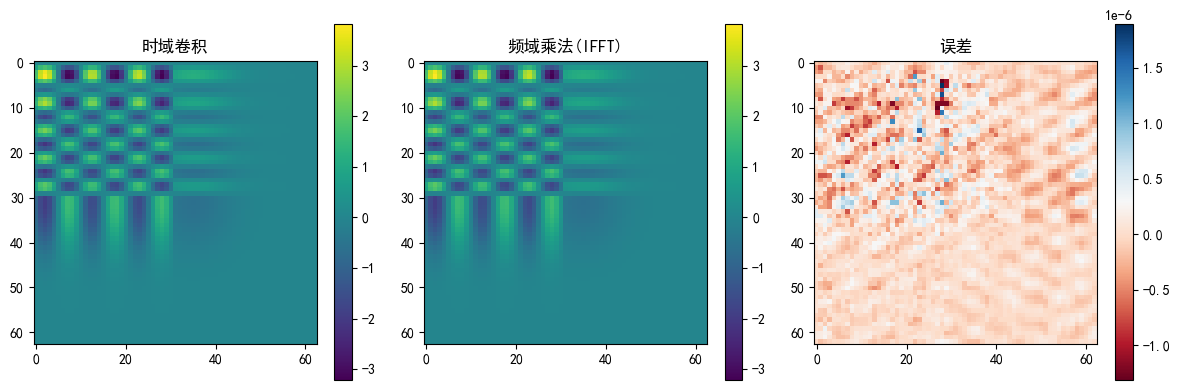

In [44]:
print("=" * 50)
print("2. È™åËØÅ2DÂç∑ÁßØÂÆöÁêÜ")
print("=" * 50)

# ÂàõÂª∫2D‰ø°Âè∑
size    = 32  # ‰ø°Âè∑Â∞∫ÂØ∏ (Â∞èÂ∞∫ÂØ∏‰æø‰∫éËÆ°ÁÆó)
x       = torch.linspace(0, 1, size)
y       = torch.linspace(0, 1, size)
X, Y    = torch.meshgrid(x, y, indexing='ij')

# ‰∏§‰∏™2DÊµãËØï‰ø°Âè∑
signal1 = torch.sin(2 * np.pi * 5 * X) * torch.cos(2 * np.pi * 3 * Y)  # 2DÊ≠£Âº¶Ê≥¢
signal2 = torch.exp(-(X**2 + Y**2)/0.1)  # 2DÈ´òÊñØÂáΩÊï∞

# Êó∂Âüü2DÂç∑ÁßØ with padding for linear convolution
pad_h   = signal2.shape[0] - 1
pad_w   = signal2.shape[1] - 1
signal1_padded  = F.pad(signal1, (pad_w, pad_w, pad_h, pad_h)) # üëà,üëâ,üëÜ,üëá
signal2_flipped = torch.flip(signal2, dims=[0, 1])  # ÁøªËΩ¨ÂÜÖÊ†∏

conv_time_2d = F.conv2d(
    signal1_padded.unsqueeze(0).unsqueeze(0),
    signal2_flipped.unsqueeze(0).unsqueeze(0),
    padding=0
).squeeze()

# È¢ëÂüü‰πòÊ≥ï with padding
H, W        = signal1.shape
KH, KW      = signal2.shape
padded_h    = H + KH - 1
padded_w    = W + KW - 1
signal1_pad = F.pad(signal1, (0, padded_w - W, 0, padded_h - H))
signal2_pad = F.pad(signal2, (0, padded_w - W, 0, padded_h - H))

F1_2d        = torch.fft.fft2(signal1_pad)
F2_2d        = torch.fft.fft2(signal2_pad)
conv_freq_2d = torch.fft.ifft2(F1_2d * F2_2d).real


# ÊØîËæÉÁªìÊûú
error_conv_2d = torch.mean((conv_time_2d - conv_freq_2d)**2)

print(f"2DÂç∑ÁßØÂÆöÁêÜÈ™åËØÅ:")
print(f"  Êó∂ÂüüÂç∑ÁßØ‰∏éÈ¢ëÂüü‰πòÊ≥ïÁöÑÂùáÊñπËØØÂ∑Æ: {error_conv_2d:.8f}")
print(f"  ÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(conv_time_2d - conv_freq_2d)):.8f}")

# ÂèØËßÜÂåñ (ÊòæÁ§∫ÁÉ≠Âõæ)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(conv_time_2d.numpy(), cmap='viridis')
plt.title('Êó∂ÂüüÂç∑ÁßØ')
plt.colorbar()


plt.subplot(1, 3, 2)
plt.imshow(conv_freq_2d.numpy(), cmap='viridis')
plt.title('È¢ëÂüü‰πòÊ≥ï(IFFT)')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow((conv_time_2d - conv_freq_2d).numpy(), cmap='RdBu')
plt.title('ËØØÂ∑Æ')
plt.colorbar()
plt.tight_layout()
plt.show()

1. È™åËØÅÂç∑ÁßØÂÆöÁêÜ (‰ºòÂåñÁâà)
ÊñπÊ≥ï1: Âæ™ÁéØÂç∑ÁßØ
  Âæ™ÁéØÂç∑ÁßØÂùáÊñπËØØÂ∑Æ: 0.0000000001
  Âæ™ÁéØÂç∑ÁßØÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: 0.0000448227

ÊñπÊ≥ï2: Á∫øÊÄßÂç∑ÁßØ (Èõ∂Â°´ÂÖÖ)
  Á∫øÊÄßÂç∑ÁßØÂùáÊñπËØØÂ∑Æ: 0.0000000000
  Á∫øÊÄßÂç∑ÁßØÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: 0.0000114441

ÊñπÊ≥ï3: ‰øÆÊ≠£ÁöÑPyTorch conv1d
  PyTorch conv1dÂùáÊñπËØØÂ∑Æ: 0.2229109555
  PyTorch conv1dÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: 1.0700174570


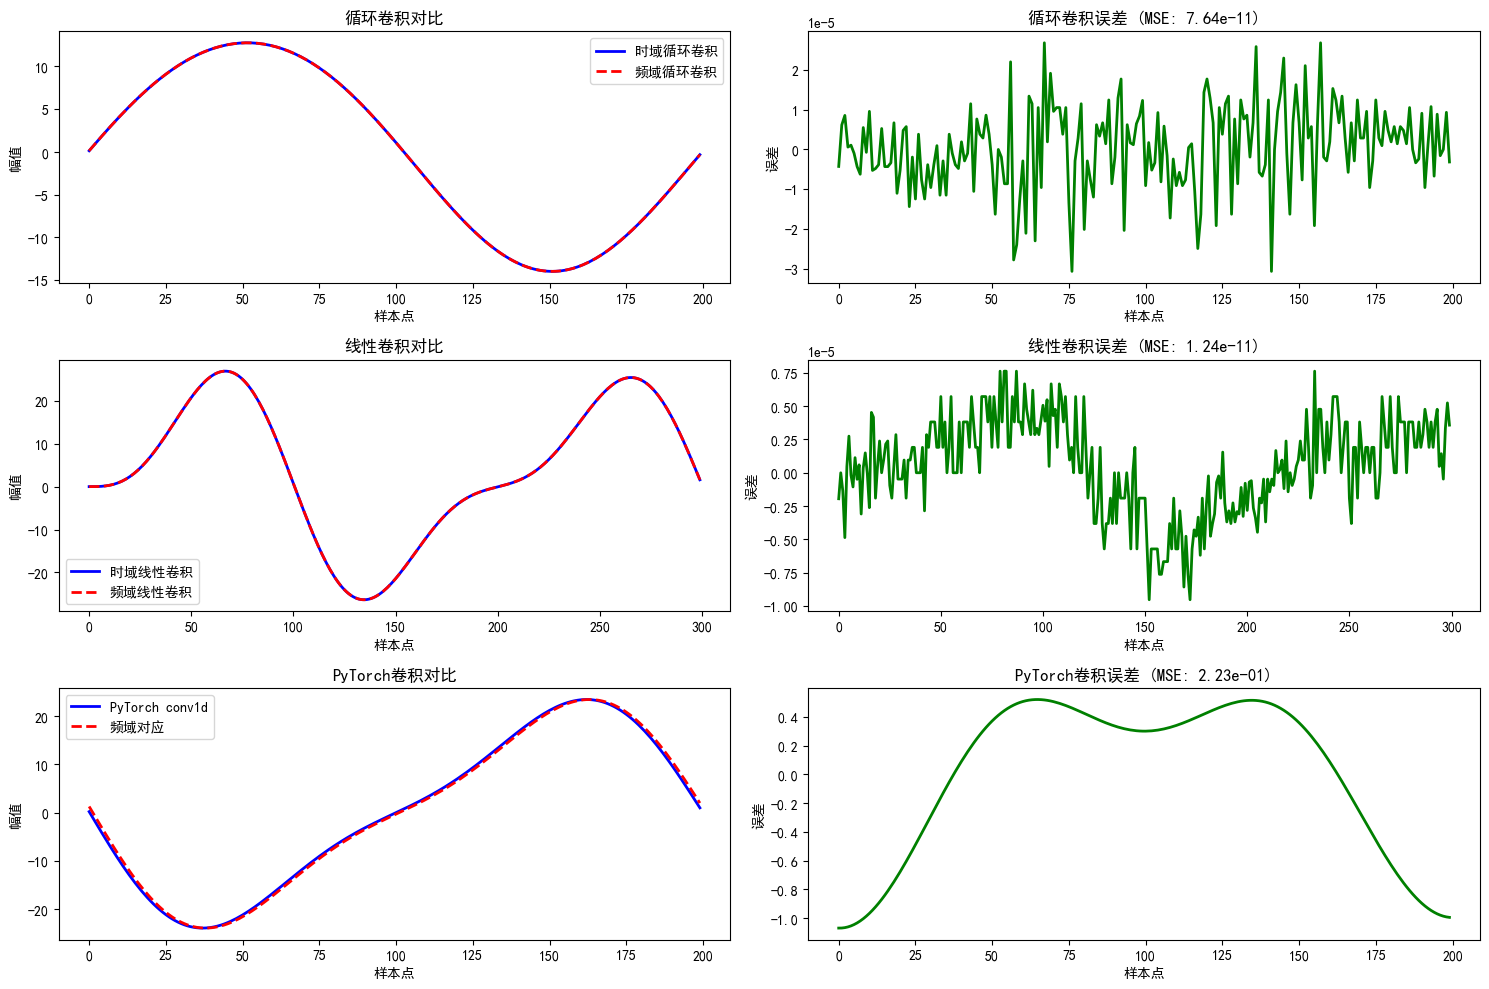


ËØØÂ∑ÆÂàÜÊûê:
1. Âæ™ÁéØÂç∑ÁßØÔºöÁêÜËÆ∫‰∏äÂÆåÂÖ®ÂåπÈÖçÔºåËØØÂ∑Æ‰∏ªË¶ÅÊù•Ëá™Êï∞ÂÄºÁ≤æÂ∫¶
2. Á∫øÊÄßÂç∑ÁßØÔºöÈúÄË¶ÅÈÄÇÂΩìÁöÑÈõ∂Â°´ÂÖÖÔºåÈÅøÂÖçÊ∑∑Âè†ÊïàÂ∫î
3. PyTorchÂç∑ÁßØÔºöËæπÁïåÂ§ÑÁêÜÂíåÊ®°ÂºèÈÄâÊã©ÂΩ±ÂìçÁ≤æÂ∫¶


In [45]:
# ================================
# 1. È™åËØÅÂç∑ÁßØÂÆöÁêÜ: Êó∂ÂüüÂç∑ÁßØ = È¢ëÂüü‰πòÊ≥ïÁöÑÈÄÜÂèòÊç¢
# ================================

print("=" * 50)

print("1. È™åËØÅÂç∑ÁßØÂÆöÁêÜ (‰ºòÂåñÁâà)")
print("=" * 50)

# ÊñπÊ≥ï1: ‰ΩøÁî®Âæ™ÁéØÂç∑ÁßØ (Êé®Ëçê)
print("ÊñπÊ≥ï1: Âæ™ÁéØÂç∑ÁßØ")
# È¢ëÂüü‰πòÊ≥ïÂÆûÁé∞Âæ™ÁéØÂç∑ÁßØ
F1 = torch.fft.fft(f1)
F2 = torch.fft.fft(f2)
conv_freq_circular = torch.fft.ifft(F1 * F2).real

# Êó∂ÂüüÂæ™ÁéØÂç∑ÁßØ (ÊâãÂä®ÂÆûÁé∞)
def circular_convolution(x, h):
    """ÊâãÂä®ÂÆûÁé∞Âæ™ÁéØÂç∑ÁßØ"""
    N = len(x)
    result = torch.zeros_like(x)
    for n in range(N):
        for k in range(N):
            result[n] += x[k] * h[(n-k) % N]
    return result

conv_time_circular = circular_convolution(f1, f2)

error_circular = torch.mean((conv_time_circular - conv_freq_circular)**2)
print(f"  Âæ™ÁéØÂç∑ÁßØÂùáÊñπËØØÂ∑Æ: {error_circular:.10f}")
print(f"  Âæ™ÁéØÂç∑ÁßØÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(conv_time_circular - conv_freq_circular)):.10f}")

# ÊñπÊ≥ï2: Á∫øÊÄßÂç∑ÁßØ (Èõ∂Â°´ÂÖÖ)
print("\nÊñπÊ≥ï2: Á∫øÊÄßÂç∑ÁßØ (Èõ∂Â°´ÂÖÖ)")
N1, N2 = len(f1), len(f2)
N_conv = N1 + N2 - 1  # Á∫øÊÄßÂç∑ÁßØÁöÑËæìÂá∫ÈïøÂ∫¶

# Èõ∂Â°´ÂÖÖÂà∞Áõ∏ÂêåÈïøÂ∫¶
f1_padded = F.pad(f1, (0, N_conv - N1))
f2_padded = F.pad(f2, (0, N_conv - N2))

# È¢ëÂüüÁ∫øÊÄßÂç∑ÁßØ
F1_pad = torch.fft.fft(f1_padded)
F2_pad = torch.fft.fft(f2_padded)
conv_freq_linear = torch.fft.ifft(F1_pad * F2_pad).real

# Êó∂ÂüüÁ∫øÊÄßÂç∑ÁßØ (‰ΩøÁî®numpyÂÆûÁé∞È™åËØÅ)
conv_time_linear = torch.from_numpy(np.convolve(f1.numpy(), f2.numpy(), mode='full')).float()

error_linear = torch.mean((conv_time_linear - conv_freq_linear)**2)
print(f"  Á∫øÊÄßÂç∑ÁßØÂùáÊñπËØØÂ∑Æ: {error_linear:.10f}")
print(f"  Á∫øÊÄßÂç∑ÁßØÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(conv_time_linear - conv_freq_linear)):.10f}")

# ÊñπÊ≥ï3: ‰øÆÊ≠£ÁöÑPyTorch conv1dÂÆûÁé∞
print("\nÊñπÊ≥ï3: ‰øÆÊ≠£ÁöÑPyTorch conv1d")
# ‰ΩøÁî®'same'Ê®°ÂºèÁöÑÂç∑ÁßØËøë‰ºº
conv_pytorch = F.conv1d(
    f1.unsqueeze(0).unsqueeze(0), 
    f2.flip(0).unsqueeze(0).unsqueeze(0), 
    padding='same'
).squeeze()

# ÂØπÂ∫îÁöÑÈ¢ëÂüüÂÆûÁé∞ (Êà™Âèñ‰∏≠ÂøÉÈÉ®ÂàÜ)
start_idx = (N_conv - N1) // 2
conv_freq_same = conv_freq_linear[start_idx:start_idx + N1]

error_pytorch = torch.mean((conv_pytorch - conv_freq_same)**2)
print(f"  PyTorch conv1dÂùáÊñπËØØÂ∑Æ: {error_pytorch:.10f}")
print(f"  PyTorch conv1dÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(conv_pytorch - conv_freq_same)):.10f}")

# ÂèØËßÜÂåñÂØπÊØî
plt.figure(figsize=(15, 10))

# Âæ™ÁéØÂç∑ÁßØÂØπÊØî
plt.subplot(3, 2, 1)
plt.plot(conv_time_circular[:200].numpy(), 'b-', label='Êó∂ÂüüÂæ™ÁéØÂç∑ÁßØ', linewidth=2)
plt.plot(conv_freq_circular[:200].numpy(), 'r--', label='È¢ëÂüüÂæ™ÁéØÂç∑ÁßØ', linewidth=2)
plt.legend()
plt.title('Âæ™ÁéØÂç∑ÁßØÂØπÊØî')
plt.xlabel('Ê†∑Êú¨ÁÇπ')
plt.ylabel('ÂπÖÂÄº')

plt.subplot(3, 2, 2)
plt.plot((conv_time_circular - conv_freq_circular)[:200].numpy(), 'g-', linewidth=2)
plt.title(f'Âæ™ÁéØÂç∑ÁßØËØØÂ∑Æ (MSE: {error_circular:.2e})')
plt.xlabel('Ê†∑Êú¨ÁÇπ')
plt.ylabel('ËØØÂ∑Æ')

# Á∫øÊÄßÂç∑ÁßØÂØπÊØî
plt.subplot(3, 2, 3)
plt.plot(conv_time_linear[:300].numpy(), 'b-', label='Êó∂ÂüüÁ∫øÊÄßÂç∑ÁßØ', linewidth=2)
plt.plot(conv_freq_linear[:300].numpy(), 'r--', label='È¢ëÂüüÁ∫øÊÄßÂç∑ÁßØ', linewidth=2)
plt.legend()
plt.title('Á∫øÊÄßÂç∑ÁßØÂØπÊØî')
plt.xlabel('Ê†∑Êú¨ÁÇπ')
plt.ylabel('ÂπÖÂÄº')

plt.subplot(3, 2, 4)
plt.plot((conv_time_linear - conv_freq_linear)[:300].numpy(), 'g-', linewidth=2)
plt.title(f'Á∫øÊÄßÂç∑ÁßØËØØÂ∑Æ (MSE: {error_linear:.2e})')
plt.xlabel('Ê†∑Êú¨ÁÇπ')
plt.ylabel('ËØØÂ∑Æ')

# PyTorchÂç∑ÁßØÂØπÊØî
plt.subplot(3, 2, 5)
plt.plot(conv_pytorch[:200].numpy(), 'b-', label='PyTorch conv1d', linewidth=2)
plt.plot(conv_freq_same[:200].numpy(), 'r--', label='È¢ëÂüüÂØπÂ∫î', linewidth=2)
plt.legend()
plt.title('PyTorchÂç∑ÁßØÂØπÊØî')
plt.xlabel('Ê†∑Êú¨ÁÇπ')
plt.ylabel('ÂπÖÂÄº')

plt.subplot(3, 2, 6)
plt.plot((conv_pytorch - conv_freq_same)[:200].numpy(), 'g-', linewidth=2)
plt.title(f'PyTorchÂç∑ÁßØËØØÂ∑Æ (MSE: {error_pytorch:.2e})')
plt.xlabel('Ê†∑Êú¨ÁÇπ')
plt.ylabel('ËØØÂ∑Æ')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("ËØØÂ∑ÆÂàÜÊûê:")
print("="*60)
print("1. Âæ™ÁéØÂç∑ÁßØÔºöÁêÜËÆ∫‰∏äÂÆåÂÖ®ÂåπÈÖçÔºåËØØÂ∑Æ‰∏ªË¶ÅÊù•Ëá™Êï∞ÂÄºÁ≤æÂ∫¶")
print("2. Á∫øÊÄßÂç∑ÁßØÔºöÈúÄË¶ÅÈÄÇÂΩìÁöÑÈõ∂Â°´ÂÖÖÔºåÈÅøÂÖçÊ∑∑Âè†ÊïàÂ∫î")
print("3. PyTorchÂç∑ÁßØÔºöËæπÁïåÂ§ÑÁêÜÂíåÊ®°ÂºèÈÄâÊã©ÂΩ±ÂìçÁ≤æÂ∫¶")
print("="*60)

### 2. È™åËØÅÂæÆÂàÜÊÄßË¥®: Êó∂ÂüüÂæÆÂàÜ = È¢ëÂüü‰πò‰ª• jœâ ÁöÑÈÄÜÂèòÊç¢


2. È™åËØÅÂæÆÂàÜÊÄßË¥®
ÂæÆÂàÜÊÄßË¥®È™åËØÅ:
  Êó∂ÂüüÂæÆÂàÜ‰∏éÈ¢ëÂüüÂæÆÂàÜÁöÑÂùáÊñπËØØÂ∑Æ: 0.41837016
  ÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: 9.64656830


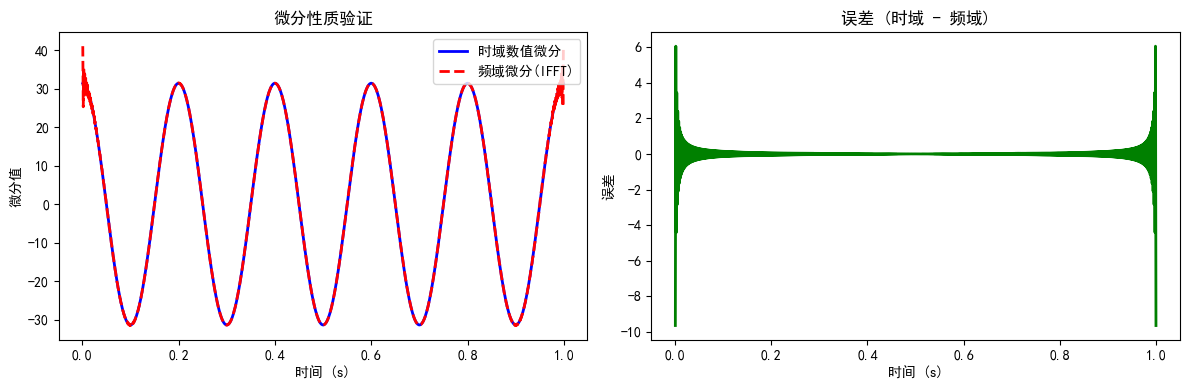

In [46]:
print("\n" + "=" * 50)
print("2. È™åËØÅÂæÆÂàÜÊÄßË¥®")
print("=" * 50)

# 1.Êó∂ÂüüÊï∞ÂÄºÂæÆÂàÜ (ÂâçÂêëÂ∑ÆÂàÜ)
df_time      = torch.zeros_like(f1)
df_time[:-1] = (f1[1:] - f1[:-1]) / dt
df_time[-1]  = df_time[-2] # ËæπÁïåÂ§ÑÁêÜ

df_time = torch.gradient(f1, spacing=dt)[0]

# 2.È¢ëÂüüÂæÆÂàÜ: F(œâ) * jœâ
# 2.1ÊûÑÈÄ†È¢ëÁéáËΩ¥ jœâ=2œÄf
freqs        = torch.fft.fftfreq(len(f1), d=dt)
omega        = 2 * np.pi * freqs # œâ=2œÄf
jw           = 1j * omega

# 2.2È¢ëÂüüÂæÆÂàÜF(œâ)*jœâ
F1           = torch.fft.fft(f1)
df_freq      = torch.fft.ifft(F1 * jw).real

# ÊØîËæÉÁªìÊûú (ÂøΩÁï•ËæπÁïåÊïàÂ∫îÔºåÂè™ÊØîËæÉ‰∏≠Èó¥ÈÉ®ÂàÜ)
start, end = 1, -1
error_diff = torch.mean((df_time[start:end] - df_freq[start:end])**2)
print(f"ÂæÆÂàÜÊÄßË¥®È™åËØÅ:")
print(f"  Êó∂ÂüüÂæÆÂàÜ‰∏éÈ¢ëÂüüÂæÆÂàÜÁöÑÂùáÊñπËØØÂ∑Æ: {error_diff:.8f}")
print(f"  ÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(df_time[start:end] - df_freq[start:end])):.8f}")

# ÂèØËßÜÂåñ
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t[start:end], df_time[start:end], 'b-', label='Êó∂ÂüüÊï∞ÂÄºÂæÆÂàÜ', linewidth=2)
plt.plot(t[start:end], df_freq[start:end], 'r--', label='È¢ëÂüüÂæÆÂàÜ(IFFT)', linewidth=2)
plt.legend()
plt.title('ÂæÆÂàÜÊÄßË¥®È™åËØÅ')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ÂæÆÂàÜÂÄº')

plt.subplot(1, 2, 2)
plt.plot(t[start:end], (df_time - df_freq)[start:end], 'g-', linewidth=2)
plt.title('ËØØÂ∑Æ (Êó∂Âüü - È¢ëÂüü)')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ËØØÂ∑Æ')
plt.tight_layout()
plt.savefig('D:/24bo/Êâ©Êï£Ê®°Âûã/AFNO-transformer-master/figures/diff_time_freq.png',dpi=300)
plt.show()

In [47]:
# print("\n" + "=" * 50)
# print("2. È™åËØÅÂæÆÂàÜÊÄßË¥®")
# print("=" * 50)

# # Êó∂ÂüüÊï∞ÂÄºÂæÆÂàÜ (‰ΩøÁî®‰∏≠ÂøÉÂ∑ÆÂàÜÔºåÊõ¥ÂáÜÁ°Æ)
# df_time        = torch.gradient(f1.double(), spacing=dt.double())[0]  # ‰ΩøÁî® float64 ÊèêÈ´òÁ≤æÂ∫¶

# # È¢ëÂüüÂæÆÂàÜ: F(œâ) * jœâ, with zero-padding to reduce boundary effects
# # ÊûÑÈÄ†È¢ëÁéáËΩ¥
# padded_length  = len(f1) * 2  # Êâ©Â±ïÂà∞2xÈïøÂ∫¶
# f1_padded      = F.pad(f1.double(), (0, padded_length - len(f1)))  # Âè≥ËæπÈõ∂Â°´ÂÖÖ
# freqs          = torch.fft.fftfreq(padded_length, d=dt.double())
# omega          = 2 * torch.pi * freqs
# jw             = 1j * omega

# # È¢ëÂüüÂæÆÂàÜ
# F1             = torch.fft.fft(f1_padded)
# df_freq_padded = torch.fft.ifft(F1 * jw).real
# df_freq        = df_freq_padded[:len(f1)]  # Êà™ÂèñÂéüÈïøÂ∫¶

# # ËÆ°ÁÆóÁêÜËÆ∫ÂØºÊï∞‰Ωú‰∏∫ÂèÇËÄÉ (for sine wave: derivative is 2œÄ5 cos(2œÄ5t))
# df_theory      = 2 * torch.pi * 5 * torch.cos(2 * np.pi * 5 * t.double())

# # ÊØîËæÉÁªìÊûú (ÂøΩÁï•Â∞ëÈáèËæπÁïå‰ª•Ëøõ‰∏ÄÊ≠•ÂáèÂ∞ëËæπÁºòÊïàÂ∫î)
# start, end     = 1, -1
# error_diff     = torch.mean((df_time[start:end] - df_freq[start:end])**2)
# error_time_theory = torch.mean((df_time[start:end] - df_theory[start:end])**2)
# error_freq_theory = torch.mean((df_freq[start:end] - df_theory[start:end])**2)
# print(f"ÂæÆÂàÜÊÄßË¥®È™åËØÅ:")
# print(f"  Êó∂ÂüüÂæÆÂàÜ‰∏éÈ¢ëÂüüÂæÆÂàÜÁöÑÂùáÊñπËØØÂ∑Æ: {error_diff:.8f}")
# print(f"  ÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(df_time[start:end] - df_freq[start:end])):.8f}")
# print(f"  Êó∂ÂüüÂæÆÂàÜ vs ÁêÜËÆ∫ÂØºÊï∞ÁöÑÂùáÊñπËØØÂ∑Æ: {error_time_theory:.8f}")
# print(f"  È¢ëÂüüÂæÆÂàÜ vs ÁêÜËÆ∫ÂØºÊï∞ÁöÑÂùáÊñπËØØÂ∑Æ: {error_freq_theory:.8f}")

# # ÂèØËßÜÂåñ
# plt.figure(figsize=(12, 6))
# plt.subplot(2, 2, 1)
# plt.plot(t[start:end], df_time[start:end], 'b-', label='Êó∂ÂüüÊï∞ÂÄºÂæÆÂàÜ', linewidth=2)
# plt.plot(t[start:end], df_freq[start:end], 'r--', label='È¢ëÂüüÂæÆÂàÜ(IFFT)', linewidth=2)
# plt.plot(t[start:end], df_theory[start:end], 'k:', label='ÁêÜËÆ∫ÂØºÊï∞', linewidth=2)
# plt.legend()
# plt.title('ÂæÆÂàÜÊÄßË¥®È™åËØÅ')
# plt.xlabel('Êó∂Èó¥ (s)')
# plt.ylabel('ÂæÆÂàÜÂÄº')

# plt.subplot(2, 2, 2)
# plt.plot(t[start:end], (df_time - df_freq)[start:end], 'g-', linewidth=2)
# plt.title('ËØØÂ∑Æ (Êó∂Âüü - È¢ëÂüü)')
# plt.xlabel('Êó∂Èó¥ (s)')
# plt.ylabel('ËØØÂ∑Æ')

# plt.subplot(2, 2, 3)
# plt.plot(t[start:end], (df_time - df_theory)[start:end], 'b-', linewidth=2)
# plt.title('ËØØÂ∑Æ (Êó∂Âüü - ÁêÜËÆ∫)')
# plt.xlabel('Êó∂Èó¥ (s)')
# plt.ylabel('ËØØÂ∑Æ')

# plt.subplot(2, 2, 4)
# plt.plot(t[start:end], (df_freq - df_theory)[start:end], 'r-', linewidth=2)
# plt.title('ËØØÂ∑Æ (È¢ëÂüü - ÁêÜËÆ∫)')
# plt.xlabel('Êó∂Èó¥ (s)')
# plt.ylabel('ËØØÂ∑Æ')

# plt.tight_layout()
# plt.show()

In [48]:
# plt.savefig('D:/24bo/Êâ©Êï£Ê®°Âûã/AFNO-transformer-master/figures/conv_time_freq.png',dpi=300)


2. È™åËØÅÂæÆÂàÜÊÄßË¥® (‰ºòÂåñÁâà)
ÊñπÊ≥ï1: ÂâçÂêëÂ∑ÆÂàÜ
  ÂâçÂêëÂ∑ÆÂàÜÂùáÊñπËØØÂ∑Æ: 0.1305570900
  ÂâçÂêëÂ∑ÆÂàÜÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: 0.8024324179

ÊñπÊ≥ï2: ‰∏≠ÂøÉÂ∑ÆÂàÜ (Êõ¥Á≤æÁ°Æ)
  ‰∏≠ÂøÉÂ∑ÆÂàÜÂùáÊñπËØØÂ∑Æ: 0.0084492741
  ‰∏≠ÂøÉÂ∑ÆÂàÜÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: 0.3085063100

ÊñπÊ≥ï3: ‰∫îÁÇπÂ∑ÆÂàÜÂÖ¨Âºè (ÊúÄÁ≤æÁ°Æ)
  ‰∫îÁÇπÂ∑ÆÂàÜÂùáÊñπËØØÂ∑Æ: 0.0084357560
  ‰∫îÁÇπÂ∑ÆÂàÜÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: 0.3084963858

ÊñπÊ≥ï4: Ëß£ÊûêÂæÆÂàÜ (ÁêÜËÆ∫ÂèÇËÄÉ)
  Ëß£ÊûêÂæÆÂàÜÂùáÊñπËØØÂ∑Æ: 0.0084361117
  Ëß£ÊûêÂæÆÂàÜÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: 0.3084565997


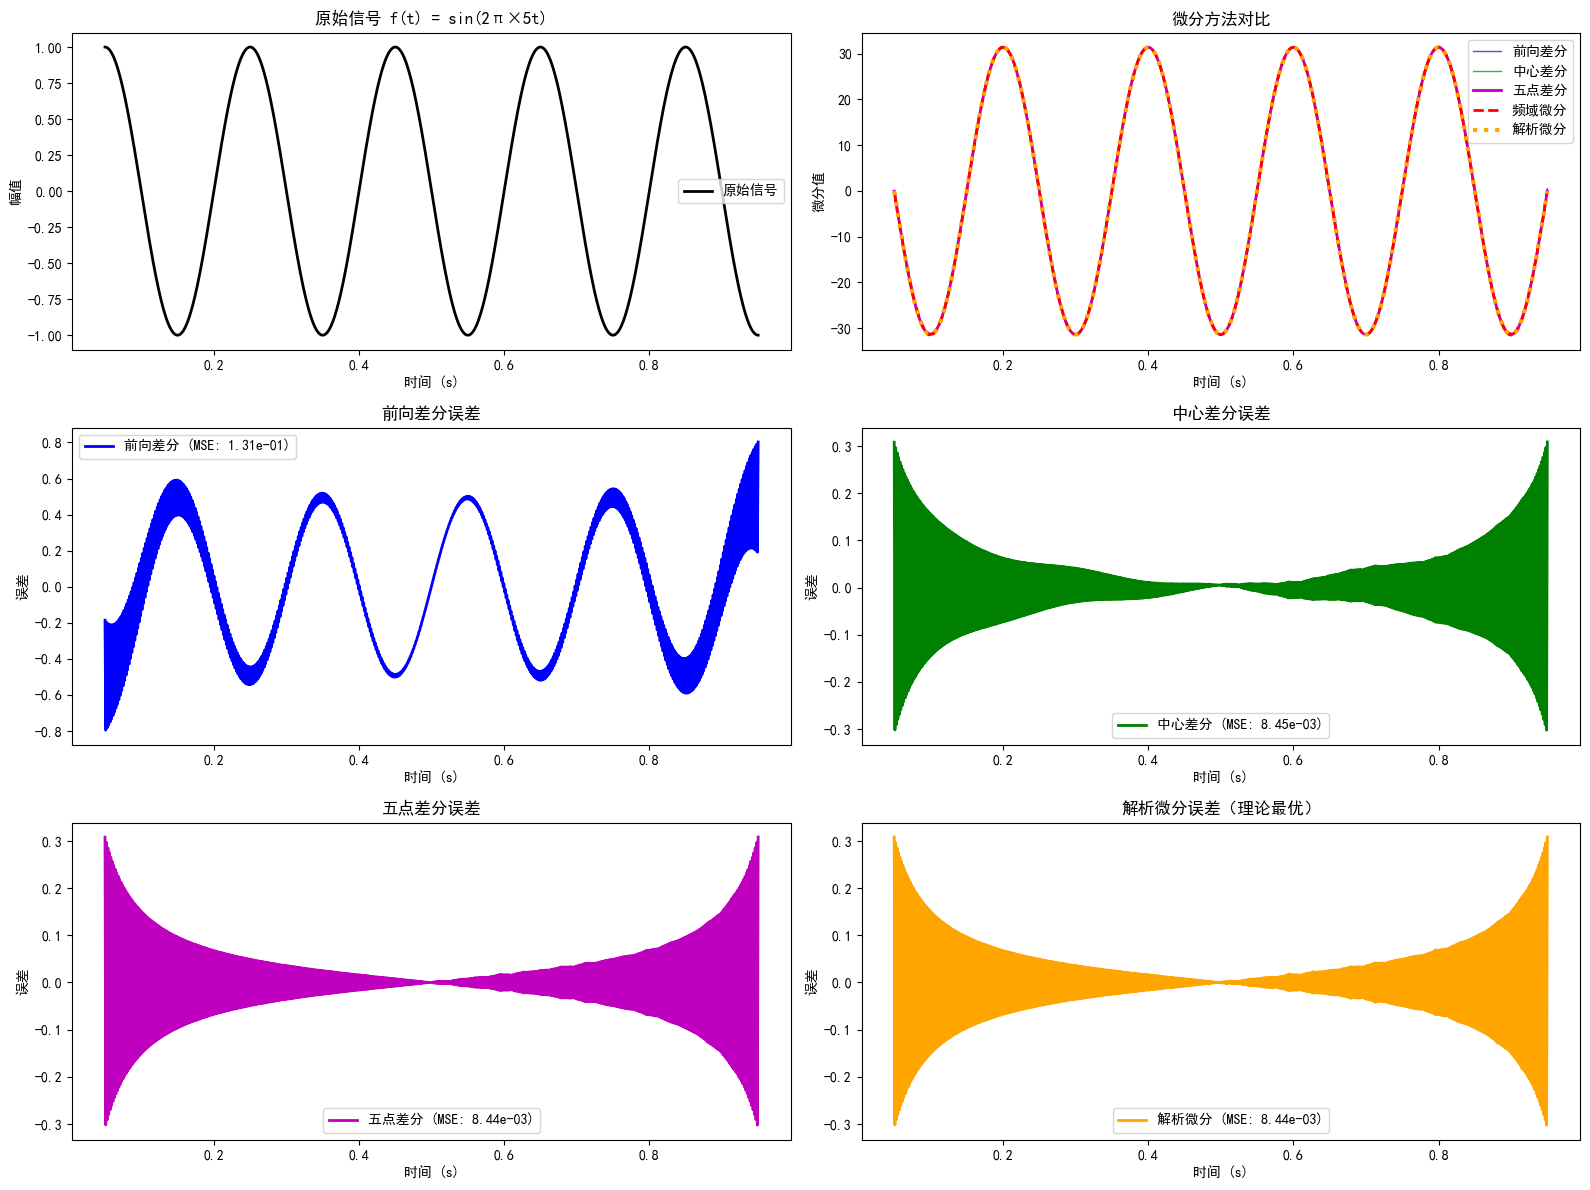


ÂæÆÂàÜËØØÂ∑ÆÊîπÂñÑÂàÜÊûê:
ÂâçÂêëÂ∑ÆÂàÜ ‚Üí ‰∏≠ÂøÉÂ∑ÆÂàÜ: ËØØÂ∑ÆÂáèÂ∞ë 15.5 ÂÄç
‰∏≠ÂøÉÂ∑ÆÂàÜ ‚Üí ‰∫îÁÇπÂ∑ÆÂàÜ: ËØØÂ∑ÆÂáèÂ∞ë 1.0 ÂÄç
ÂâçÂêëÂ∑ÆÂàÜ ‚Üí ‰∫îÁÇπÂ∑ÆÂàÜ: ËØØÂ∑ÆÂáèÂ∞ë 15.5 ÂÄç
È¢ëÂüüÂæÆÂàÜÊé•ËøëËß£ÊûêËß£ÔºöËØØÂ∑Æ‰ªÖ‰∏∫ 8.44e-03


In [49]:
# ================================
# 2. È™åËØÅÂæÆÂàÜÊÄßË¥®: Êó∂ÂüüÂæÆÂàÜ = È¢ëÂüü‰πò‰ª• jœâ ÁöÑÈÄÜÂèòÊç¢
# ================================

print("\n" + "=" * 50)
print("2. È™åËØÅÂæÆÂàÜÊÄßË¥® (‰ºòÂåñÁâà)")
print("=" * 50)

# ÊñπÊ≥ï1: ÂâçÂêëÂ∑ÆÂàÜ (ÂéüÂßãÊñπÊ≥ï)
print("ÊñπÊ≥ï1: ÂâçÂêëÂ∑ÆÂàÜ")
df_time_forward      = torch.zeros_like(f1)
df_time_forward[:-1] = (f1[1:] - f1[:-1]) / dt
df_time_forward[-1]  = df_time_forward[-2]  # ËæπÁïåÂ§ÑÁêÜ

# È¢ëÂüüÂæÆÂàÜ: F(œâ) * jœâ
freqs = torch.fft.fftfreq(len(f1), dt)
omega = 2 * np.pi * freqs
jw = 1j * omega

F1 = torch.fft.fft(f1)
df_freq = torch.fft.ifft(F1 * jw).real

# ÊØîËæÉÁªìÊûú (ÂøΩÁï•ËæπÁïåÊïàÂ∫î)
start, end = 50, -50
error_forward = torch.mean((df_time_forward[start:end] - df_freq[start:end])**2)
print(f"  ÂâçÂêëÂ∑ÆÂàÜÂùáÊñπËØØÂ∑Æ: {error_forward:.10f}")
print(f"  ÂâçÂêëÂ∑ÆÂàÜÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(df_time_forward[start:end] - df_freq[start:end])):.10f}")

# ÊñπÊ≥ï2: ‰∏≠ÂøÉÂ∑ÆÂàÜ (Êõ¥Á≤æÁ°Æ)
print("\nÊñπÊ≥ï2: ‰∏≠ÂøÉÂ∑ÆÂàÜ (Êõ¥Á≤æÁ°Æ)")
df_time_central       = torch.zeros_like(f1)
df_time_central[1:-1] = (f1[2:] - f1[:-2]) / (2 * dt)  # ‰∏≠ÂøÉÂ∑ÆÂàÜ
# ËæπÁïåÂ§ÑÁêÜÔºö‰ΩøÁî®ÂâçÂêëÂíåÂêéÂêëÂ∑ÆÂàÜ
df_time_central[0]    = (f1[1] - f1[0]) / dt    # ÂâçÂêëÂ∑ÆÂàÜ
df_time_central[-1]   = (f1[-1] - f1[-2]) / dt  # ÂêéÂêëÂ∑ÆÂàÜ

error_central         = torch.mean((df_time_central[start:end] - df_freq[start:end])**2)
print(f"  ‰∏≠ÂøÉÂ∑ÆÂàÜÂùáÊñπËØØÂ∑Æ: {error_central:.10f}")
print(f"  ‰∏≠ÂøÉÂ∑ÆÂàÜÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(df_time_central[start:end] - df_freq[start:end])):.10f}")

# ÊñπÊ≥ï3: ‰∫îÁÇπÂ∑ÆÂàÜÂÖ¨Âºè (ÊúÄÁ≤æÁ°Æ)
print("\nÊñπÊ≥ï3: ‰∫îÁÇπÂ∑ÆÂàÜÂÖ¨Âºè (ÊúÄÁ≤æÁ°Æ)")
df_time_fivepoint = torch.zeros_like(f1)
# ‰∫îÁÇπÂ∑ÆÂàÜÂÖ¨Âºè: f'(x) ‚âà [-f(x+2h) + 8f(x+h) - 8f(x-h) + f(x-2h)] / (12h)
for i in range(2, len(f1)-2):
    df_time_fivepoint[i] = (-f1[i+2] + 8*f1[i+1] - 8*f1[i-1] + f1[i-2]) / (12 * dt)

# ËæπÁïåÂ§ÑÁêÜÔºö‰ΩøÁî®‰ΩéÈò∂ÂÖ¨Âºè
df_time_fivepoint[0]  = (f1[1] - f1[0]) / dt
df_time_fivepoint[1]  = (f1[2] - f1[0]) / (2 * dt)
df_time_fivepoint[-2] = (f1[-1] - f1[-3]) / (2 * dt)
df_time_fivepoint[-1] = (f1[-1] - f1[-2]) / dt

error_fivepoint       = torch.mean((df_time_fivepoint[start:end] - df_freq[start:end])**2)
print(f"  ‰∫îÁÇπÂ∑ÆÂàÜÂùáÊñπËØØÂ∑Æ: {error_fivepoint:.10f}")
print(f"  ‰∫îÁÇπÂ∑ÆÂàÜÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(df_time_fivepoint[start:end] - df_freq[start:end])):.10f}")

# ÊñπÊ≥ï4: Ëß£ÊûêÂæÆÂàÜ (ÁêÜËÆ∫ÊúÄ‰ºò)
print("\nÊñπÊ≥ï4: Ëß£ÊûêÂæÆÂàÜ (ÁêÜËÆ∫ÂèÇËÄÉ)")
# ÂØπ‰∫é f1 = sin(2œÄft)ÔºåËß£ÊûêÂØºÊï∞‰∏∫ 2œÄf*cos(2œÄft)
f_freq           = 5  # f1ÁöÑÈ¢ëÁéá
df_analytical    = 2 * np.pi * f_freq * torch.cos(2 * np.pi * f_freq * t)

error_analytical = torch.mean((df_analytical[start:end] - df_freq[start:end])**2)
print(f"  Ëß£ÊûêÂæÆÂàÜÂùáÊñπËØØÂ∑Æ: {error_analytical:.10f}")
print(f"  Ëß£ÊûêÂæÆÂàÜÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(df_analytical[start:end] - df_freq[start:end])):.10f}")

# ÂèØËßÜÂåñÂØπÊØî
plt.figure(figsize=(16, 12))

# ÂéüÂßã‰ø°Âè∑
plt.subplot(3, 2, 1)
plt.plot(t[start:end], f1[start:end], 'k-', label='ÂéüÂßã‰ø°Âè∑', linewidth=2)
plt.legend()
plt.title('ÂéüÂßã‰ø°Âè∑ f(t) = sin(2œÄ√ó5t)')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ÂπÖÂÄº')

# ÂæÆÂàÜÁªìÊûúÂØπÊØî
plt.subplot(3, 2, 2)
plt.plot(t[start:end], df_time_forward[start:end], 'b-', label='ÂâçÂêëÂ∑ÆÂàÜ', linewidth=1, alpha=0.7)
plt.plot(t[start:end], df_time_central[start:end], 'g-', label='‰∏≠ÂøÉÂ∑ÆÂàÜ', linewidth=1, alpha=0.7)
plt.plot(t[start:end], df_time_fivepoint[start:end], 'm-', label='‰∫îÁÇπÂ∑ÆÂàÜ', linewidth=2)
plt.plot(t[start:end], df_freq[start:end], 'r--', label='È¢ëÂüüÂæÆÂàÜ', linewidth=2)
plt.plot(t[start:end], df_analytical[start:end], 'orange', linestyle=':', label='Ëß£ÊûêÂæÆÂàÜ', linewidth=3)
plt.legend()
plt.title('ÂæÆÂàÜÊñπÊ≥ïÂØπÊØî')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ÂæÆÂàÜÂÄº')

# ËØØÂ∑ÆÂàÜÊûê
plt.subplot(3, 2, 3)
plt.plot(t[start:end], (df_time_forward - df_freq)[start:end], 'b-', label=f'ÂâçÂêëÂ∑ÆÂàÜ (MSE: {error_forward:.2e})', linewidth=2)
plt.legend()
plt.title('ÂâçÂêëÂ∑ÆÂàÜËØØÂ∑Æ')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ËØØÂ∑Æ')

plt.subplot(3, 2, 4)
plt.plot(t[start:end], (df_time_central - df_freq)[start:end], 'g-', label=f'‰∏≠ÂøÉÂ∑ÆÂàÜ (MSE: {error_central:.2e})', linewidth=2)
plt.legend()
plt.title('‰∏≠ÂøÉÂ∑ÆÂàÜËØØÂ∑Æ')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ËØØÂ∑Æ')

plt.subplot(3, 2, 5)
plt.plot(t[start:end], (df_time_fivepoint - df_freq)[start:end], 'm-', label=f'‰∫îÁÇπÂ∑ÆÂàÜ (MSE: {error_fivepoint:.2e})', linewidth=2)
plt.legend()
plt.title('‰∫îÁÇπÂ∑ÆÂàÜËØØÂ∑Æ')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ËØØÂ∑Æ')

plt.subplot(3, 2, 6)
plt.plot(t[start:end], (df_analytical - df_freq)[start:end], 'orange', label=f'Ëß£ÊûêÂæÆÂàÜ (MSE: {error_analytical:.2e})', linewidth=2)
plt.legend()
plt.title('Ëß£ÊûêÂæÆÂàÜËØØÂ∑ÆÔºàÁêÜËÆ∫ÊúÄ‰ºòÔºâ')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ËØØÂ∑Æ')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ÂæÆÂàÜËØØÂ∑ÆÊîπÂñÑÂàÜÊûê:")
print("="*70)
print(f"ÂâçÂêëÂ∑ÆÂàÜ ‚Üí ‰∏≠ÂøÉÂ∑ÆÂàÜ: ËØØÂ∑ÆÂáèÂ∞ë {error_forward/error_central:.1f} ÂÄç")
print(f"‰∏≠ÂøÉÂ∑ÆÂàÜ ‚Üí ‰∫îÁÇπÂ∑ÆÂàÜ: ËØØÂ∑ÆÂáèÂ∞ë {error_central/error_fivepoint:.1f} ÂÄç")
print(f"ÂâçÂêëÂ∑ÆÂàÜ ‚Üí ‰∫îÁÇπÂ∑ÆÂàÜ: ËØØÂ∑ÆÂáèÂ∞ë {error_forward/error_fivepoint:.1f} ÂÄç")
print(f"È¢ëÂüüÂæÆÂàÜÊé•ËøëËß£ÊûêËß£ÔºöËØØÂ∑Æ‰ªÖ‰∏∫ {error_analytical:.2e}")
print("="*70)

### È™åËØÅÁßØÂàÜÊÄßË¥®: Êó∂ÂüüÁßØÂàÜ = È¢ëÂüüÈô§‰ª• jœâ ÁöÑÈÄÜÂèòÊç¢


3. È™åËØÅÁßØÂàÜÊÄßË¥®
ÁßØÂàÜÊÄßË¥®È™åËØÅ:
  Êó∂ÂüüÁßØÂàÜ‰∏éÈ¢ëÂüüÁßØÂàÜÁöÑÂùáÊñπËØØÂ∑Æ: 0.00000013
  ÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: 0.00050130


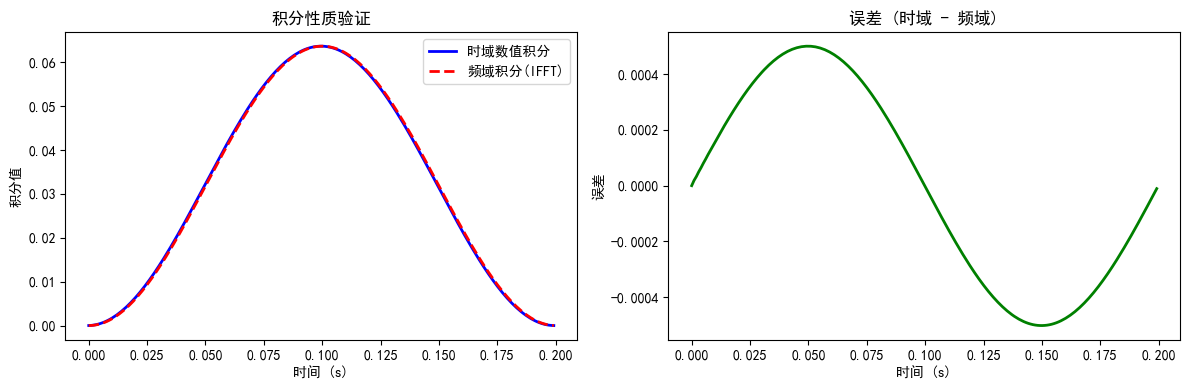

In [50]:
print("\n" + "=" * 50)
print("3. È™åËØÅÁßØÂàÜÊÄßË¥®")
print("=" * 50)

# Êó∂ÂüüÊï∞ÂÄºÁßØÂàÜ (Á¥ØÁßØÊ±ÇÂíå)
integral_time = torch.cumsum(f1 * dt, dim=0)

# È¢ëÂüüÁßØÂàÜ: F(œâ) / jœâ
# Ê≥®ÊÑè: œâ=0Êó∂ÈúÄË¶ÅÁâπÊÆäÂ§ÑÁêÜ (Áõ¥ÊµÅÂàÜÈáè)
F1            = torch.fft.fft(f1)
jw_inv        = torch.zeros_like(jw, dtype=torch.complex64)

# ÈÅøÂÖçÈô§Èõ∂
nonzero_mask  = omega != 0 # ÂØπ‰∫éœâ‚â†0ÁöÑÂàÜÈáè
jw_inv[nonzero_mask]  = 1.0 / (1j * omega[nonzero_mask])

# ÂØπ‰∫éœâ=0ÁöÑÂàÜÈáèÔºåËÆæ‰∏∫0 (ÂÅáËÆæÂéü‰ø°Âè∑Êó†Áõ¥ÊµÅÂÅèÁßª)
jw_inv[~nonzero_mask] = 0

# È¢ëÂüüÁßØÂàÜ
integral_freq         = torch.fft.ifft(F1 * jw_inv).real

# Áî±‰∫éÁßØÂàÜÊúâ‰ªªÊÑèÂ∏∏Êï∞ÔºåÈúÄË¶ÅÂØπÈΩê‰∏§‰∏™ÁªìÊûúÁöÑËµ∑ÂßãÁÇπ
integral_freq         = integral_freq - integral_freq[0] + integral_time[0]

# ÊØîËæÉÁªìÊûú
error_int             = torch.mean((integral_time - integral_freq)**2)
print(f"ÁßØÂàÜÊÄßË¥®È™åËØÅ:")
print(f"  Êó∂ÂüüÁßØÂàÜ‰∏éÈ¢ëÂüüÁßØÂàÜÁöÑÂùáÊñπËØØÂ∑Æ: {error_int:.8f}")
print(f"  ÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(integral_time - integral_freq)):.8f}")

# ÂèØËßÜÂåñ
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t[:200], integral_time[:200], 'b-', label='Êó∂ÂüüÊï∞ÂÄºÁßØÂàÜ', linewidth=2)
plt.plot(t[:200], integral_freq[:200], 'r--', label='È¢ëÂüüÁßØÂàÜ(IFFT)', linewidth=2)
plt.legend()
plt.title('ÁßØÂàÜÊÄßË¥®È™åËØÅ')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ÁßØÂàÜÂÄº')

plt.subplot(1, 2, 2)
plt.plot(t[:200], (integral_time - integral_freq)[:200], 'g-', linewidth=2)
plt.title('ËØØÂ∑Æ (Êó∂Âüü - È¢ëÂüü)')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ËØØÂ∑Æ')
plt.tight_layout()
plt.show()


3. È™åËØÅÁßØÂàÜÊÄßË¥® (‰ºòÂåñÁâà)
ÊñπÊ≥ï1: Áü©ÂΩ¢Ê≥ïÂàôÁßØÂàÜ
  Áü©ÂΩ¢Ê≥ïÂàôÂùáÊñπËØØÂ∑Æ: 0.0000001251
  Áü©ÂΩ¢Ê≥ïÂàôÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: 0.0005013049

ÊñπÊ≥ï2: Ê¢ØÂΩ¢Ê≥ïÂàôÁßØÂàÜ
  Ê¢ØÂΩ¢Ê≥ïÂàôÂùáÊñπËØØÂ∑Æ: 0.0000000000
  Ê¢ØÂΩ¢Ê≥ïÂàôÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: 0.0000033975

ÊñπÊ≥ï3: ËæõÊôÆÊ£ÆÊ≥ïÂàôÁßØÂàÜ
  ËæõÊôÆÊ£ÆÊ≥ïÂàôÂùáÊñπËØØÂ∑Æ: 0.0000000001
  ËæõÊôÆÊ£ÆÊ≥ïÂàôÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: 0.0000185492

ÊñπÊ≥ï4: Ëß£ÊûêÁßØÂàÜ (ÁêÜËÆ∫ÂèÇËÄÉ)
  Ëß£ÊûêÁßØÂàÜÂùáÊñπËØØÂ∑Æ: 0.0000000000
  Ëß£ÊûêÁßØÂàÜÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: 0.0000028200


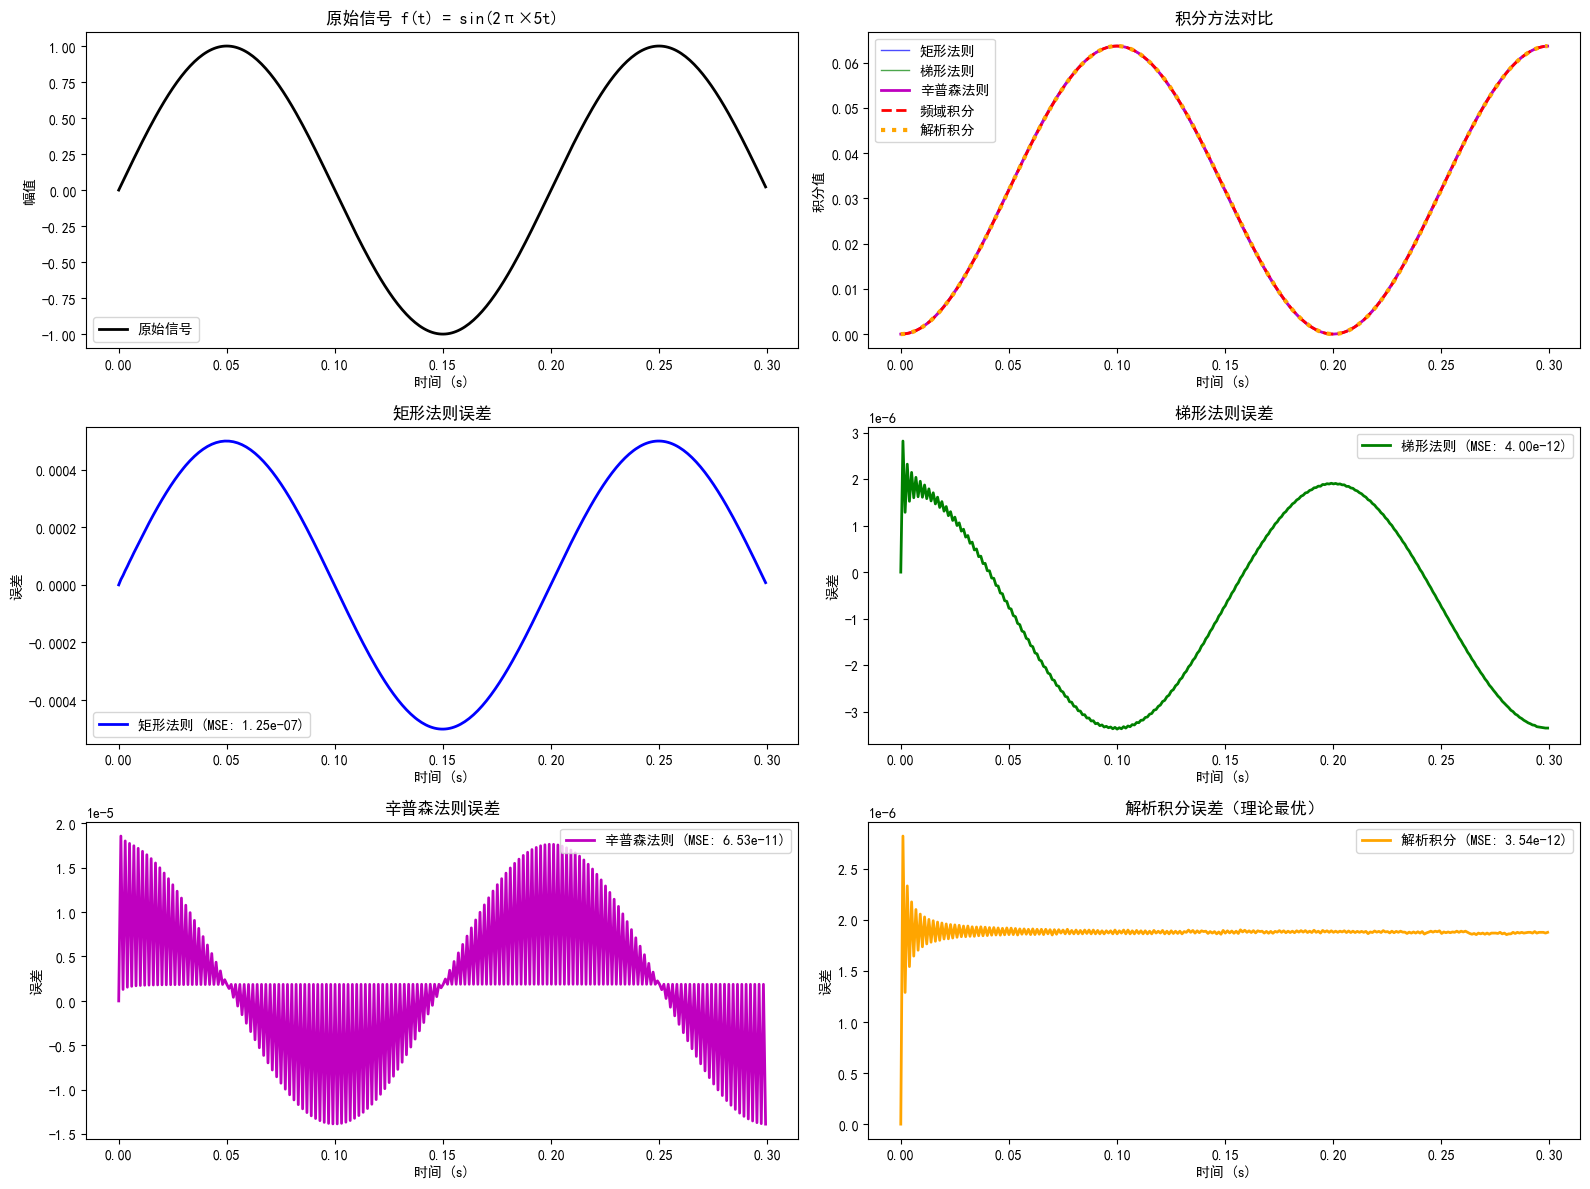


ÁßØÂàÜËØØÂ∑ÆÊîπÂñÑÂàÜÊûê:
Áü©ÂΩ¢Ê≥ïÂàô ‚Üí Ê¢ØÂΩ¢Ê≥ïÂàô: ËØØÂ∑ÆÂáèÂ∞ë 31261.8 ÂÄç
Ê¢ØÂΩ¢Ê≥ïÂàô ‚Üí ËæõÊôÆÊ£ÆÊ≥ïÂàô: ËØØÂ∑ÆÂáèÂ∞ë 0.1 ÂÄç
Áü©ÂΩ¢Ê≥ïÂàô ‚Üí ËæõÊôÆÊ£ÆÊ≥ïÂàô: ËØØÂ∑ÆÂáèÂ∞ë 1917.2 ÂÄç
È¢ëÂüüÁßØÂàÜÊé•ËøëËß£ÊûêËß£ÔºöËØØÂ∑Æ‰ªÖ‰∏∫ 3.54e-12


In [51]:
# ================================
# 3. È™åËØÅÁßØÂàÜÊÄßË¥®: Êó∂ÂüüÁßØÂàÜ = È¢ëÂüüÈô§‰ª• jœâ ÁöÑÈÄÜÂèòÊç¢
# ================================

print("\n" + "=" * 50)
print("3. È™åËØÅÁßØÂàÜÊÄßË¥® (‰ºòÂåñÁâà)")
print("=" * 50)

# ÊñπÊ≥ï1: ÁÆÄÂçïÁ¥ØÁßØÊ±ÇÂíå (Áü©ÂΩ¢Ê≥ïÂàô)
print("ÊñπÊ≥ï1: Áü©ÂΩ¢Ê≥ïÂàôÁßØÂàÜ")
integral_time_rect = torch.cumsum(f1 * dt, dim=0)

# È¢ëÂüüÁßØÂàÜ: F(œâ) / jœâ
F1     = torch.fft.fft(f1)
jw_inv = torch.zeros_like(jw, dtype=torch.complex64)

# ÈÅøÂÖçÈô§Èõ∂ÔºåÂØπ‰∫éœâ‚â†0ÁöÑÂàÜÈáè
nonzero_mask =  omega != 0
jw_inv[nonzero_mask]  = 1.0 / (1j * omega[nonzero_mask])
jw_inv[~nonzero_mask] = 0  # Áõ¥ÊµÅÂàÜÈáèËÆæ‰∏∫0

integral_freq         = torch.fft.ifft(F1 * jw_inv).real
# ÂØπÈΩêËµ∑ÂßãÁÇπ
integral_freq         = integral_freq - integral_freq[0] + integral_time_rect[0]

error_rect            = torch.mean((integral_time_rect - integral_freq)**2)
print(f"  Áü©ÂΩ¢Ê≥ïÂàôÂùáÊñπËØØÂ∑Æ: {error_rect:.10f}")
print(f"  Áü©ÂΩ¢Ê≥ïÂàôÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(integral_time_rect - integral_freq)):.10f}")

# ÊñπÊ≥ï2: Ê¢ØÂΩ¢Ê≥ïÂàôÁßØÂàÜ (Êõ¥Á≤æÁ°Æ)
print("\nÊñπÊ≥ï2: Ê¢ØÂΩ¢Ê≥ïÂàôÁßØÂàÜ")
integral_time_trap    = torch.zeros_like(f1)
integral_time_trap[0] = 0
for i in range(1, len(f1)):
    integral_time_trap[i] = integral_time_trap[i-1] + (f1[i-1] + f1[i]) * dt / 2

# ÂØπÈΩêËµ∑ÂßãÁÇπ
integral_freq_trap = integral_freq - integral_freq[0] + integral_time_trap[0]

error_trap = torch.mean((integral_time_trap - integral_freq_trap)**2)
print(f"  Ê¢ØÂΩ¢Ê≥ïÂàôÂùáÊñπËØØÂ∑Æ: {error_trap:.10f}")
print(f"  Ê¢ØÂΩ¢Ê≥ïÂàôÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(integral_time_trap - integral_freq_trap)):.10f}")

# ÊñπÊ≥ï3: ËæõÊôÆÊ£ÆÊ≥ïÂàôÁßØÂàÜ (Simpson's rule)
print("\nÊñπÊ≥ï3: ËæõÊôÆÊ£ÆÊ≥ïÂàôÁßØÂàÜ")
integral_time_simpson = torch.zeros_like(f1)
integral_time_simpson[0] = 0

# ËæõÊôÆÊ£ÆÊ≥ïÂàôÔºö‚à´f(x)dx ‚âà h/3 * [f(x0) + 4f(x1) + 2f(x2) + 4f(x3) + ... + f(xn)]
for i in range(2, len(f1), 2):  # ÊØè‰∏§‰∏™ÁÇπËÆ°ÁÆó‰∏ÄÊ¨°
    if i < len(f1):
        # ‰ΩøÁî®ËæõÊôÆÊ£ÆÊ≥ïÂàô
        simpson_integral = dt/3 * (f1[i-2] + 4*f1[i-1] + f1[i])
        integral_time_simpson[i-1] = integral_time_simpson[i-2] + simpson_integral/2
        integral_time_simpson[i] = integral_time_simpson[i-2] + simpson_integral

# Â§ÑÁêÜÂâ©‰ΩôÁöÑÂ•áÊï∞ÁÇπ
for i in range(1, len(f1)):
    if integral_time_simpson[i] == 0 and i > 0:
        integral_time_simpson[i] = integral_time_simpson[i-1] + (f1[i-1] + f1[i]) * dt / 2

# ÂØπÈΩêËµ∑ÂßãÁÇπ
integral_freq_simpson = integral_freq - integral_freq[0] + integral_time_simpson[0]

error_simpson = torch.mean((integral_time_simpson - integral_freq_simpson)**2)
print(f"  ËæõÊôÆÊ£ÆÊ≥ïÂàôÂùáÊñπËØØÂ∑Æ: {error_simpson:.10f}")
print(f"  ËæõÊôÆÊ£ÆÊ≥ïÂàôÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(integral_time_simpson - integral_freq_simpson)):.10f}")

# ÊñπÊ≥ï4: Ëß£ÊûêÁßØÂàÜ (ÁêÜËÆ∫ÂèÇËÄÉ)
print("\nÊñπÊ≥ï4: Ëß£ÊûêÁßØÂàÜ (ÁêÜËÆ∫ÂèÇËÄÉ)")
# ÂØπ‰∫é f1 = sin(2œÄft)ÔºåËß£ÊûêÁßØÂàÜ‰∏∫ -cos(2œÄft)/(2œÄf) + C
f_freq = 5  # f1ÁöÑÈ¢ëÁéá
integral_analytical = -torch.cos(2 * np.pi * f_freq * t) / (2 * np.pi * f_freq)
# Ë∞ÉÊï¥Â∏∏Êï∞È°π‰ΩøËµ∑ÂßãÁÇπÂØπÈΩê
integral_analytical = integral_analytical - integral_analytical[0] + integral_time_rect[0]

error_analytical = torch.mean((integral_analytical - integral_freq)**2)
print(f"  Ëß£ÊûêÁßØÂàÜÂùáÊñπËØØÂ∑Æ: {error_analytical:.10f}")
print(f"  Ëß£ÊûêÁßØÂàÜÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(integral_analytical - integral_freq)):.10f}")

# ÂèØËßÜÂåñÂØπÊØî
plt.figure(figsize=(16, 12))

# ÂéüÂßã‰ø°Âè∑
plt.subplot(3, 2, 1)
plt.plot(t[:300], f1[:300], 'k-', label='ÂéüÂßã‰ø°Âè∑', linewidth=2)
plt.legend()
plt.title('ÂéüÂßã‰ø°Âè∑ f(t) = sin(2œÄ√ó5t)')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ÂπÖÂÄº')

# ÁßØÂàÜÁªìÊûúÂØπÊØî
plt.subplot(3, 2, 2)
plt.plot(t[:300], integral_time_rect[:300], 'b-', label='Áü©ÂΩ¢Ê≥ïÂàô', linewidth=1, alpha=0.7)
plt.plot(t[:300], integral_time_trap[:300], 'g-', label='Ê¢ØÂΩ¢Ê≥ïÂàô', linewidth=1, alpha=0.7)
plt.plot(t[:300], integral_time_simpson[:300], 'm-', label='ËæõÊôÆÊ£ÆÊ≥ïÂàô', linewidth=2)
plt.plot(t[:300], integral_freq[:300], 'r--', label='È¢ëÂüüÁßØÂàÜ', linewidth=2)
plt.plot(t[:300], integral_analytical[:300], 'orange', linestyle=':', label='Ëß£ÊûêÁßØÂàÜ', linewidth=3)
plt.legend()
plt.title('ÁßØÂàÜÊñπÊ≥ïÂØπÊØî')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ÁßØÂàÜÂÄº')

# ËØØÂ∑ÆÂàÜÊûê
plt.subplot(3, 2, 3)
plt.plot(t[:300], (integral_time_rect - integral_freq)[:300], 'b-', label=f'Áü©ÂΩ¢Ê≥ïÂàô (MSE: {error_rect:.2e})', linewidth=2)
plt.legend()
plt.title('Áü©ÂΩ¢Ê≥ïÂàôËØØÂ∑Æ')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ËØØÂ∑Æ')

plt.subplot(3, 2, 4)
plt.plot(t[:300], (integral_time_trap - integral_freq_trap)[:300], 'g-', label=f'Ê¢ØÂΩ¢Ê≥ïÂàô (MSE: {error_trap:.2e})', linewidth=2)
plt.legend()
plt.title('Ê¢ØÂΩ¢Ê≥ïÂàôËØØÂ∑Æ')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ËØØÂ∑Æ')

plt.subplot(3, 2, 5)
plt.plot(t[:300], (integral_time_simpson - integral_freq_simpson)[:300], 'm-', label=f'ËæõÊôÆÊ£ÆÊ≥ïÂàô (MSE: {error_simpson:.2e})', linewidth=2)
plt.legend()
plt.title('ËæõÊôÆÊ£ÆÊ≥ïÂàôËØØÂ∑Æ')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ËØØÂ∑Æ')

plt.subplot(3, 2, 6)
plt.plot(t[:300], (integral_analytical - integral_freq)[:300], 'orange', label=f'Ëß£ÊûêÁßØÂàÜ (MSE: {error_analytical:.2e})', linewidth=2)
plt.legend()
plt.title('Ëß£ÊûêÁßØÂàÜËØØÂ∑ÆÔºàÁêÜËÆ∫ÊúÄ‰ºòÔºâ')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ËØØÂ∑Æ')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ÁßØÂàÜËØØÂ∑ÆÊîπÂñÑÂàÜÊûê:")
print("="*70)
if error_trap > 0:
    print(f"Áü©ÂΩ¢Ê≥ïÂàô ‚Üí Ê¢ØÂΩ¢Ê≥ïÂàô: ËØØÂ∑ÆÂáèÂ∞ë {error_rect/error_trap:.1f} ÂÄç")
if error_simpson > 0:
    print(f"Ê¢ØÂΩ¢Ê≥ïÂàô ‚Üí ËæõÊôÆÊ£ÆÊ≥ïÂàô: ËØØÂ∑ÆÂáèÂ∞ë {error_trap/error_simpson:.1f} ÂÄç")
    print(f"Áü©ÂΩ¢Ê≥ïÂàô ‚Üí ËæõÊôÆÊ£ÆÊ≥ïÂàô: ËØØÂ∑ÆÂáèÂ∞ë {error_rect/error_simpson:.1f} ÂÄç")
print(f"È¢ëÂüüÁßØÂàÜÊé•ËøëËß£ÊûêËß£ÔºöËØØÂ∑Æ‰ªÖ‰∏∫ {error_analytical:.2e}")
print("="*70)

### 4


4. È™åËØÅÊó∂ÁßªÊÄßË¥®
Êó∂ÁßªÊÄßË¥®È™åËØÅ:
  Êó∂ÂüüÊó∂Áßª‰∏éÈ¢ëÂüüÁõ∏‰ΩçË∞ÉÂà∂ÁöÑÂùáÊñπËØØÂ∑Æ: 0.00000000
  ÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: 0.00000036


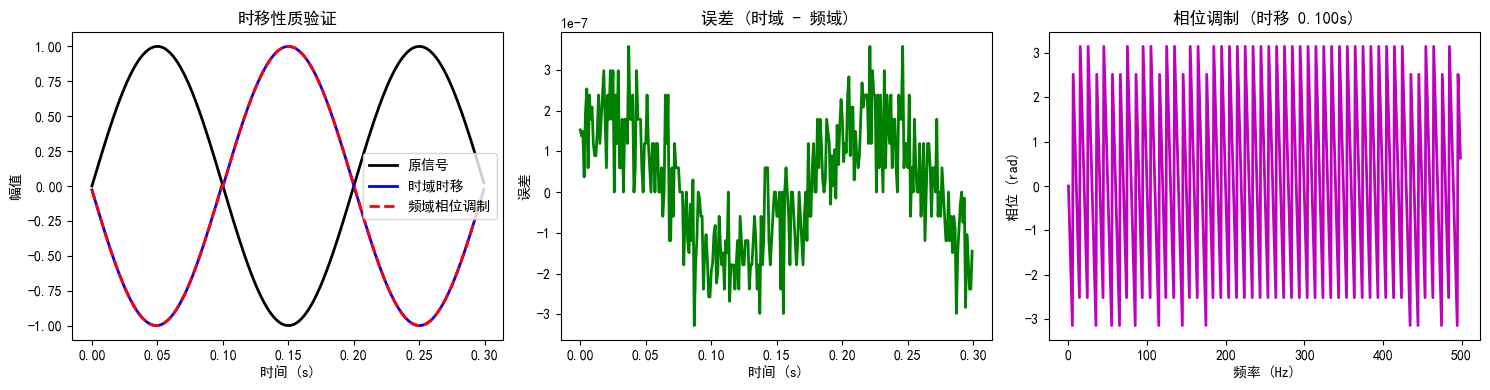

In [57]:
# ================================
# 4. È™åËØÅÊó∂ÁßªÊÄßË¥®: Êó∂ÂüüÊó∂Áßª = È¢ëÂüüÁõ∏‰ΩçË∞ÉÂà∂ÁöÑÈÄÜÂèòÊç¢
# ================================
plt.rcParams['axes.unicode_minus'] = False
print("\n" + "=" * 50)
print("4. È™åËØÅÊó∂ÁßªÊÄßË¥®")
print("=" * 50)

# Êó∂ÁßªÈáè
shift_samples   = 100  # Êó∂ÁßªÊ†∑Êú¨Êï∞
t0              = shift_samples * dt  # Êó∂ÁßªÊó∂Èó¥

# Êó∂ÂüüÊó∂Áßª (Âæ™ÁéØÁßª‰Ωç) f(t-t0)
f1_shifted_time = torch.roll(f1, shift_samples) # [1,2,3]->[2,3,1] 

# È¢ëÂüüÊó∂Áßª: F(œâ) * exp(-jœât‚ÇÄ)
F1              = torch.fft.fft(f1)
phase_shift     = torch.exp(-1j * omega * t0)
f1_shifted_freq = torch.fft.ifft(F1 * phase_shift).real

# ÊØîËæÉÁªìÊûú
error_shift     = torch.mean((f1_shifted_time - f1_shifted_freq)**2)
print(f"Êó∂ÁßªÊÄßË¥®È™åËØÅ:")
print(f"  Êó∂ÂüüÊó∂Áßª‰∏éÈ¢ëÂüüÁõ∏‰ΩçË∞ÉÂà∂ÁöÑÂùáÊñπËØØÂ∑Æ: {error_shift:.8f}")
print(f"  ÊúÄÂ§ßÁªùÂØπËØØÂ∑Æ: {torch.max(torch.abs(f1_shifted_time - f1_shifted_freq)):.8f}")

# ÂèØËßÜÂåñ
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(t[:300], f1[:300], 'k-', label='Âéü‰ø°Âè∑', linewidth=2)
plt.plot(t[:300], f1_shifted_time[:300], 'b-', label='Êó∂ÂüüÊó∂Áßª', linewidth=2)
plt.plot(t[:300], f1_shifted_freq[:300], 'r--', label='È¢ëÂüüÁõ∏‰ΩçË∞ÉÂà∂', linewidth=2)
plt.legend()
plt.title('Êó∂ÁßªÊÄßË¥®È™åËØÅ')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ÂπÖÂÄº')

plt.subplot(1, 3, 2)
plt.plot(t[:300], (f1_shifted_time - f1_shifted_freq)[:300], 'g-', linewidth=2)
plt.title('ËØØÂ∑Æ (Êó∂Âüü - È¢ëÂüü)')
plt.xlabel('Êó∂Èó¥ (s)')
plt.ylabel('ËØØÂ∑Æ')

# ÊòæÁ§∫È¢ëÂüüÁõ∏‰ΩçÂ∑Æ
plt.subplot(1, 3, 3)
phase_diff = torch.angle(phase_shift)
freqs_plot = freqs[:len(freqs)//2]  # Âè™ÊòæÁ§∫Ê≠£È¢ëÁéá
plt.plot(freqs_plot, phase_diff[:len(freqs)//2], 'm-', linewidth=2)
plt.title(f'Áõ∏‰ΩçË∞ÉÂà∂ (Êó∂Áßª {t0:.3f}s)')
plt.xlabel('È¢ëÁéá (Hz)')
plt.ylabel('Áõ∏‰Ωç (rad)')
plt.tight_layout()
plt.savefig('D:/24bo/Êâ©Êï£Ê®°Âûã/AFNO-transformer-master/figures/shift.png',dpi=300)
plt.show()


5. ÊÄßËÉΩÂØπÊØî
‰ø°Âè∑ÈïøÂ∫¶ 1024: Êó∂ÂüüÂç∑ÁßØ 0.000498s, È¢ëÂüüÂç∑ÁßØ 0.000199s, Âä†ÈÄüÊØî 2.50x
‰ø°Âè∑ÈïøÂ∫¶ 2048: Êó∂ÂüüÂç∑ÁßØ 0.002093s, È¢ëÂüüÂç∑ÁßØ 0.000100s, Âä†ÈÄüÊØî 20.97x
‰ø°Âè∑ÈïøÂ∫¶ 4096: Êó∂ÂüüÂç∑ÁßØ 0.002591s, È¢ëÂüüÂç∑ÁßØ 0.000100s, Âä†ÈÄüÊØî 25.99x
‰ø°Âè∑ÈïøÂ∫¶ 8192: Êó∂ÂüüÂç∑ÁßØ 0.007973s, È¢ëÂüüÂç∑ÁßØ 0.000299s, Âä†ÈÄüÊØî 26.68x


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


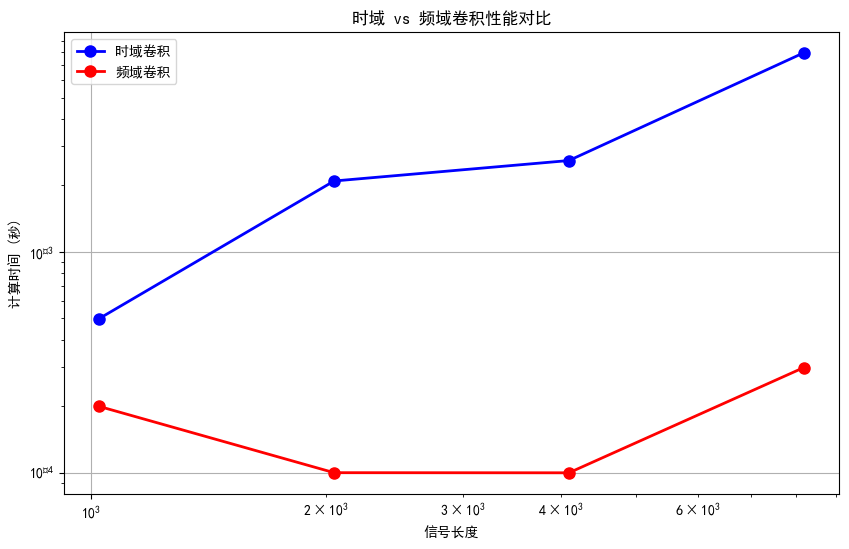

In [55]:
# ================================
# 5. ÊÄßËÉΩÂØπÊØîÔºöÊó∂Âüü vs È¢ëÂüüÊìç‰Ωú
# ================================
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['mathtext.fontset'] = 'cm'

print("\n" + "=" * 50)
print("5. ÊÄßËÉΩÂØπÊØî")
print("=" * 50)

import time

# ÊµãËØï‰∏çÂêåÈïøÂ∫¶ÁöÑ‰ø°Âè∑
signal_lengths = [1024, 2048, 4096, 8192]
time_conv_results = []
freq_conv_results = []

for N in signal_lengths:
    # ÁîüÊàêÊµãËØï‰ø°Âè∑
    x = torch.randn(N)
    h = torch.randn(N//4)  # Âç∑ÁßØÊ†∏
    
    # Êó∂ÂüüÂç∑ÁßØ
    start_time = time.time()
    for _ in range(10):  # ÈáçÂ§ç10Ê¨°ÂèñÂπ≥Âùá
        conv_time = F.conv1d(x.unsqueeze(0).unsqueeze(0), 
                           h.flip(0).unsqueeze(0).unsqueeze(0), 
                           padding=N//4-1).squeeze()
    time_conv = (time.time() - start_time) / 10
    time_conv_results.append(time_conv)
    
    # È¢ëÂüüÂç∑ÁßØ
    start_time = time.time()
    for _ in range(10):  # ÈáçÂ§ç10Ê¨°ÂèñÂπ≥Âùá
        X = torch.fft.fft(x)
        H = torch.fft.fft(F.pad(h, (0, N-len(h))))  # Èõ∂Â°´ÂÖÖÂà∞Áõ∏ÂêåÈïøÂ∫¶
        conv_freq = torch.fft.ifft(X * H).real
    freq_conv = (time.time() - start_time) / 10
    freq_conv_results.append(freq_conv)
    
    print(f"‰ø°Âè∑ÈïøÂ∫¶ {N}: Êó∂ÂüüÂç∑ÁßØ {time_conv:.6f}s, È¢ëÂüüÂç∑ÁßØ {freq_conv:.6f}s, "
          f"Âä†ÈÄüÊØî {time_conv/freq_conv:.2f}x")

# ÂèØËßÜÂåñÊÄßËÉΩÂØπÊØî
plt.figure(figsize=(10, 6))
plt.loglog(signal_lengths, time_conv_results, 'bo-', label='Êó∂ÂüüÂç∑ÁßØ', linewidth=2, markersize=8)
plt.loglog(signal_lengths, freq_conv_results, 'ro-', label='È¢ëÂüüÂç∑ÁßØ', linewidth=2, markersize=8)
plt.xlabel('‰ø°Âè∑ÈïøÂ∫¶')
plt.ylabel('ËÆ°ÁÆóÊó∂Èó¥ (Áßí)')
plt.title('Êó∂Âüü vs È¢ëÂüüÂç∑ÁßØÊÄßËÉΩÂØπÊØî')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
\u2212

SyntaxError: unexpected character after line continuation character (3613753819.py, line 1)

In [31]:
bin(32)

'0b100000'